### Import library

In [ ]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans  
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

### Prepare datasets

In [2]:
inf = open('GSE28_series_matrix.txt','r').readlines()
X = []
label = []
for line in inf[65:-1]:
    split = line.split()
    data_in = split[1:]
    data_float = [float(e) for e in data_in]
    if len(data_float) == 7:
        X.append(data_float)
        label.append(split[0])
    
X = np.array(X)

In [3]:
print(X[0],label[0])

[ 0.143  0.165 -0.211  0.272  0.046  0.429  0.183] 1


In [4]:
print(len(X))

5549


### K-mean clustering

In [10]:
kmeans = KMeans(n_clusters=6)  
kmeans.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
print(kmeans.cluster_centers_)  

[[-0.1930544   0.01647185 -0.34362113  0.04878495 -0.11300949 -0.14729412
  -0.27684187]
 [ 0.12658924  0.05390551  0.28244357  0.13041273  0.12591076  0.10813648
   0.24565682]
 [ 0.35568368 -0.0349667   1.07425527  0.05227747  0.21829856  0.25197558
   1.01290344]
 [-0.4550517  -0.37446803  0.64192381 -0.44541633 -0.0681483  -0.17882449
   0.53387347]
 [ 0.85761798 -0.09429588  2.27888015  0.05362921  0.26720225  0.64484644
   2.3787191 ]
 [-0.4119963   0.16808872 -1.36507579  0.11078743 -0.03898706 -0.32903142
  -1.41963216]]


### Visualize (K-mean)

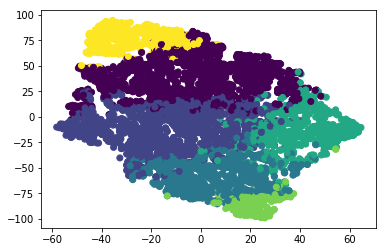

In [34]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(X)
xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs,ys,c=kmeans.labels_)
plt.show()

### Hierarachical clustering

In [41]:
Hclustering = AgglomerativeClustering(n_clusters=6,
 affinity='cosine', linkage='complete')
Hclustering.fit(X)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=6, pooling_func=<function mean at 0x10e89eea0>)

In [44]:
print(Hclustering.labels_)  

[2 3 2 ... 3 3 3]


### Visualize (Hierarachical)

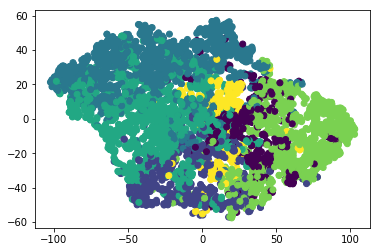

In [45]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(X)
xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs,ys,c=Hclustering.labels_)
plt.show()